In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
train_data= pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')
train_data.head(5)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

In [6]:
train_data.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Response                     int64
dtype: object

In [7]:
test_data.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
dtype: object

In [8]:
train_data['Marital_Status'].unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
train_data['Marital_Status'].value_counts()

Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [10]:
train_data.loc[train_data['Marital_Status'] == 'Absurd', 'Marital_Status'] = 2
train_data.loc[train_data['Marital_Status'] == 'Alone', 'Marital_Status'] = 3
train_data.loc[train_data['Marital_Status'] == 'Divorced', 'Marital_Status'] = 4
train_data.loc[train_data['Marital_Status'] == 'Married', 'Marital_Status'] = 1
train_data.loc[train_data['Marital_Status'] == 'Single', 'Marital_Status'] = 5
train_data.loc[train_data['Marital_Status'] == 'Together', 'Marital_Status'] = 6
train_data.loc[train_data['Marital_Status'] == 'Widow', 'Marital_Status'] = 7
train_data.loc[train_data['Marital_Status'] == 'YOLO', 'Marital_Status'] = 8

In [11]:
train_data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,4,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,6,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,5,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,5,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,1,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [12]:
test_data.loc[test_data['Marital_Status'] == 'Absurd', 'Marital_Status'] = 2
test_data.loc[test_data['Marital_Status'] == 'Alone', 'Marital_Status'] = 3
test_data.loc[test_data['Marital_Status'] == 'Divorced', 'Marital_Status'] = 4
test_data.loc[test_data['Marital_Status'] == 'Married', 'Marital_Status'] = 1
test_data.loc[test_data['Marital_Status'] == 'Single', 'Marital_Status'] = 5
test_data.loc[test_data['Marital_Status'] == 'Together', 'Marital_Status'] = 6
test_data.loc[test_data['Marital_Status'] == 'Widow', 'Marital_Status'] = 7
test_data.loc[test_data['Marital_Status'] == 'YOLO', 'Marital_Status'] = 8

In [13]:
test_data.head(5)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,5,48556.8,0,1,11-01-2013,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,7,57499.2,0,1,22-11-2012,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,1,17025.6,0,0,28-02-2013,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,6,91983.6,0,0,16-08-2013,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,6,78235.2,0,2,25-07-2013,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0


In [14]:
train_data['Education_Level'].unique()

array(['Graduation', '2n Cycle', 'Master', 'PhD', 'Basic'], dtype=object)

In [15]:
train_data.loc[train_data['Education_Level'] == 'Graduation', 'Education_Level'] = 1
train_data.loc[train_data['Education_Level'] == '2n Cycle', 'Education_Level'] = 2
train_data.loc[train_data['Education_Level'] == 'Master', 'Education_Level'] = 3
train_data.loc[train_data['Education_Level'] == 'PhD', 'Education_Level'] = 4
train_data.loc[train_data['Education_Level'] == 'Basic', 'Education_Level'] = 5

In [16]:
test_data.loc[test_data['Education_Level'] == 'Graduation', 'Education_Level'] = 1
test_data.loc[test_data['Education_Level'] == '2n Cycle', 'Education_Level'] = 2
test_data.loc[test_data['Education_Level'] == 'Master', 'Education_Level'] = 3
test_data.loc[test_data['Education_Level'] == 'PhD', 'Education_Level'] = 4
test_data.loc[test_data['Education_Level'] == 'Basic', 'Education_Level'] = 5

In [17]:
train_data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,1,4,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,1,6,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,1,5,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2,5,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,1,1,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [19]:
train_data = train_data.astype({'Education_Level': int, 'Marital_Status': int})

In [20]:
test_data = test_data.astype({'Education_Level': int, 'Marital_Status': int})

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   int32  
 3   Marital_Status           1568 non-null   int32  
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    int32  
 3   Marital_Status           672 non-null    int32  
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

In [23]:
train_data['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

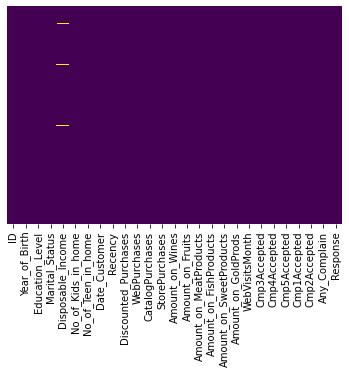

In [24]:
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

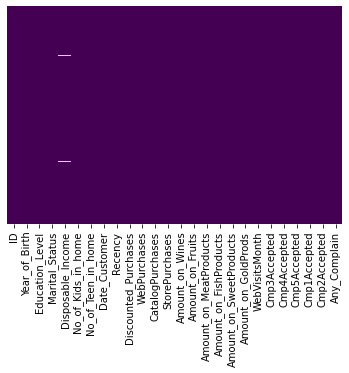

In [25]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
train_data.groupby(['No_of_Kids_in_home'])['Disposable_Income'].mean()

No_of_Kids_in_home
0    74785.532646
1    46348.820433
2    48075.563636
Name: Disposable_Income, dtype: float64

In [27]:
test_data.groupby(['No_of_Kids_in_home'])['Disposable_Income'].mean()

No_of_Kids_in_home
0    72752.438049
1    48619.214938
2    44196.830769
Name: Disposable_Income, dtype: float64

In [28]:
def Disposable_Income(cols):
    Disposable_Income = cols[1]
    No_of_Kids_in_home= cols[0]
    if pd.isnull(Disposable_Income):
        if No_of_Kids_in_home == 0:
            return 72752.438049
        elif No_of_Kids_in_home == 1:
            return 48619.214938
        else:
            return 48075.563636
    else:
        return Disposable_Income

In [29]:
train_data['Disposable_Income'] = train_data[['No_of_Kids_in_home','Disposable_Income']].apply(Disposable_Income,axis=1)

In [30]:
train_data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,1,4,77504.4,1,1,22-06-2014,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,1,6,56784.0,0,1,01-08-2013,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,1,5,103714.8,0,0,21-11-2013,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2,5,46311.6,1,0,13-09-2013,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,1,1,87486.0,0,0,21-01-2014,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   int32  
 3   Marital_Status           1568 non-null   int32  
 4   Disposable_Income        1568 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

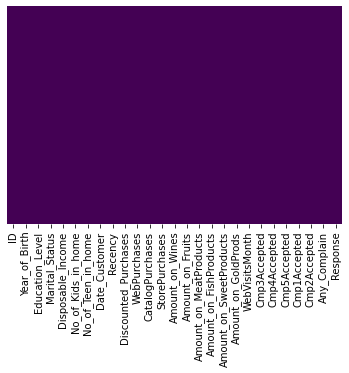

In [32]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

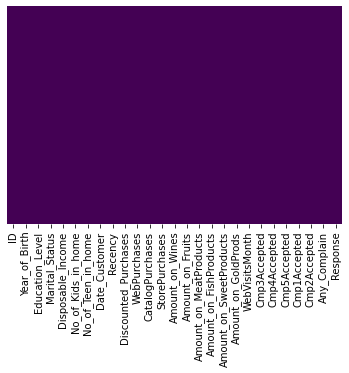

In [33]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
test_data['Disposable_Income'] = test_data[['No_of_Kids_in_home','Disposable_Income']].apply(Disposable_Income,axis=1)

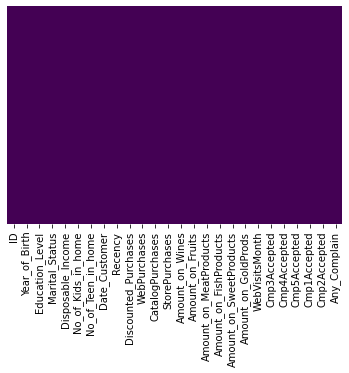

In [35]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

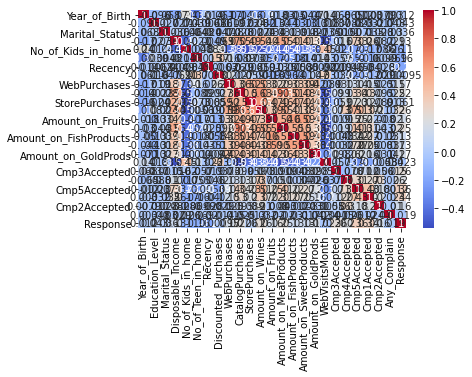

In [36]:
sns.heatmap(train_data.corr(),cmap='coolwarm',annot=True)

In [37]:
corr = test_data.corr()
display(corr)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
Year_of_Birth,1.000000,-0.050796,-0.081101,-0.140472,0.197683,-0.346079,-0.028738,-0.057223,-0.094291,-0.073047,-0.052726,-0.076157,-0.017412,-0.035244,-0.021838,0.041084,-0.040465,0.085203,0.047794,-0.049076,0.055114,-0.026520,-0.036357,-0.092305
Education_Level,-0.050796,1.000000,-0.046292,-0.009861,-0.048092,0.005801,-0.076868,-0.030062,0.004959,-0.063330,-0.023326,0.085241,-0.126696,-0.096718,-0.150273,-0.130725,-0.203280,0.043661,-0.013728,0.029722,0.031676,-0.055328,0.046368,-0.048858
Marital_Status,-0.081101,-0.046292,1.000000,-0.018837,0.029258,-0.012135,0.015850,0.024614,-0.036361,-0.022541,-0.026017,-0.013043,-0.049570,0.013144,0.029317,-0.001113,-0.010731,0.009353,-0.031721,0.057005,-0.030618,-0.013222,0.053450,0.050220
Disposable_Income,-0.140472,-0.009861,-0.018837,1.000000,-0.460794,0.009771,0.000462,-0.132501,0.420171,0.714355,0.657831,0.700396,0.528593,0.687472,0.536081,0.516842,0.352193,-0.631566,-0.016101,0.231173,0.350205,0.332844,0.104886,-0.025091
No_of_Kids_in_home,0.197683,-0.048092,0.029258,-0.460794,1.000000,-0.004172,0.015553,0.251995,-0.303259,-0.489288,-0.444939,-0.438586,-0.309679,-0.399967,-0.341568,-0.340065,-0.298311,0.442406,0.001009,-0.150841,-0.159845,-0.176846,-0.070770,0.070942
No_of_Teen_in_home,-0.346079,0.005801,-0.012135,0.009771,-0.004172,1.000000,0.016648,0.420533,0.153188,-0.171157,-0.005400,0.000773,-0.197335,-0.289749,-0.263968,-0.212900,-0.040560,0.158692,-0.008534,0.000814,-0.137584,-0.096547,-0.028598,-0.005396
Recency,-0.028738,-0.076868,0.015850,0.000462,0.015553,0.016648,1.000000,0.007835,0.018688,0.014986,0.017365,0.005774,0.013321,0.020369,0.014998,-0.005402,0.054679,-0.018956,-0.065919,0.048910,-0.009247,0.029262,0.053088,-0.001851
Discounted_Purchases,-0.057223,-0.030062,0.024614,-0.132501,0.251995,0.420533,0.007835,1.000000,0.302170,-0.104729,0.089906,0.040095,-0.144223,-0.192120,-0.141544,-0.160450,0.053332,0.384847,0.010104,0.005137,-0.159250,-0.127504,-0.057700,0.027171
WebPurchases,-0.094291,0.004959,-0.036361,0.420171,-0.303259,0.153188,0.018688,0.302170,1.000000,0.427624,0.462209,0.570227,0.241131,0.299842,0.206520,0.245703,0.426694,0.025501,0.070586,0.216773,0.139955,0.179255,0.053937,-0.020913
CatalogPurchases,-0.073047,-0.063330,-0.022541,0.714355,-0.489288,-0.171157,0.014986,-0.104729,0.427624,1.000000,0.583090,0.652876,0.496768,0.708257,0.595049,0.533574,0.465326,-0.507644,0.122266,0.175631,0.263426,0.338505,0.114736,-0.011654


### PERFORMING PCA¶

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
y = train_data['Response']

In [40]:
x= train_data.drop(['ID','Year_of_Birth','Date_Customer','Response'],axis=1)

In [41]:
test =test_data.drop(['ID','Year_of_Birth','Date_Customer'],axis=1)

In [42]:
x = scaler.fit_transform(x)
x_test_data = scaler.fit_transform(test)

In [43]:
nr.seed(5000)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [44]:
#USING PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC,LinearSVC
#NB_mod = BernoulliNB()
# from sklearn.linear_model import LogisticRegression
logistic_model = linear_model.LogisticRegression() 
# logistic_model.fit(X_train, y_train)

# construct pipeline
# scaler = StandardScaler()
# poly_features = PolynomialFeatures(degree=2)
#lin_reg = LinearRegression()

# pipe = Pipeline([
#     ('scaler', scaler),
#     ('poly', poly_features),
#     ('regressor', lin_reg)
# ])

In [45]:
# from sklearn.feature_selection import f_regression, SelectKBest
nr.seed(8000)
from sklearn.decomposition import PCA
# from sklearn.pipeline import FeatureUnion

scaler = StandardScaler()
pca = PCA(n_components=10)
#NB_mod = BernoulliNB()
svc_model = SVC(probability = True)
# logistic_model = linear_model.LogisticRegression() 


pca_pipe = Pipeline([('scaler', scaler), ('dim_red', pca)])

pipe = Pipeline([('pca_pipe', pca_pipe), ('classifier', svc_model)])
pipe.fit(X_train, y_train)
#pipe.fit(X_test, y_test)

print("number of columns/features in the original data set: {}".format(X_train))#.shape[-1]))
print("number of columns/features in the new data set: {}".format(pca_pipe.transform(X_train)))#.shape[-1]))
print("score: {}".format(pipe.score(X_train, y_train)))

number of columns/features in the original data set: [[ 2.16496445 -1.18927021 -1.03233392 ... -0.262389   -0.11366572
  -0.09143374]
 [-0.87548719 -1.18927021 -1.8601385  ... -0.262389   -0.11366572
  -0.09143374]
 [-0.87548719 -1.18927021 -0.60747965 ... -0.262389   -0.11366572
  -0.09143374]
 ...
 [-0.87548719  0.60421446  1.11587023 ... -0.262389   -0.11366572
  -0.09143374]
 [-0.11537428 -1.18927021 -0.74431368 ... -0.262389   -0.11366572
  -0.09143374]
 [-0.87548719  0.60421446  0.12331628 ... -0.262389   -0.11366572
  -0.09143374]]
number of columns/features in the new data set: [[-2.11290781 -0.44708322  0.04971086 ... -0.71849314  0.20108647
  -1.80814873]
 [ 2.20874332  0.58941276 -1.07499696 ... -3.3899847   4.30908461
   2.29514478]
 [-2.51025529 -0.16404     0.0572753  ... -0.31511644 -0.28685285
   0.83903222]
 ...
 [ 2.53032758 -1.59353002 -1.31463174 ... -0.06561865 -0.18571577
   0.11062729]
 [-2.29087322 -0.94347484  0.23738696 ... -0.23630105  0.21885835
  -0.2913863

In [46]:
features= pca_pipe.transform(X_train)##.shape[-1]

In [47]:
feat=pca_pipe.transform(X_train)

In [48]:
test_feat =  pca_pipe.transform(X_test)##.shape[-1]

In [49]:
x_test_data = pca_pipe.transform(x_test_data) 

In [50]:
x_da =pca_pipe.transform(x) #for the whole training data set features

In [51]:
svc_scores = svc_model.predict(test_feat)

In [52]:
def print_metrics(labels, predictions):
    metrics = sklm.precision_recall_fscore_support(labels, predictions)
    conf = sklm.confusion_matrix(labels, predictions)
    print('                 Confusion matrix')
    print('                 Actual positive    Actual negative')
    print('Score positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Score negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, predictions))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
print_metrics(y_test, svc_scores)

                 Confusion matrix
                 Actual positive    Actual negative
Score positive       388                 7
Score negative        59                17

Accuracy  0.86
 
           Positive      Negative
Num case      395            76
Precision    0.87          0.71
Recall       0.98          0.22
F1           0.92          0.34


In [53]:
pred = svc_model.predict(x_test_data)

In [54]:
submission = pd.DataFrame({'ID':test_data['ID'],'Response':pred})

In [55]:
submission.to_csv('Response_submission_1.csv',index=False)